In [1]:
from fastai import *
from fastai.vision import *
from fastai.vision.all import * 
import os

## **Path of dataset**

In [2]:

path='/home/tinhpt/Desktop/flower-recognition/train and valid algorithm/train'
print(os.listdir(path))

['rose', 'daisy', 'dandelion', 'tulip', 'sunflower']


# **Preparing Data**
1. Splitting data into 80:20 ratio
2. Resized input image to 224 * 224 pixels
3. Normalizing data

In [3]:
files = get_image_files(path)
len(files)

3463

In [4]:
data = ImageDataLoaders.from_folder(path,valid_pct=0.2, batch_tfms=[*aug_transforms(size=224, max_warp=0.), Normalize.from_stats(*imagenet_stats)], item_tfms=RandomResizedCrop(450, min_scale=0.75)
)


## **Display of Random Images**

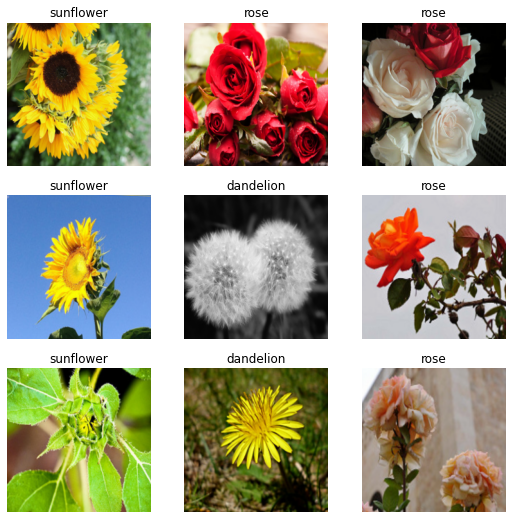

In [5]:
##data.show_batch(rows=3,fig=(5,5))
data.show_batch()

# **Creaing Densenet201 Model Architecture**

In [6]:
from torchvision.models import *

#model=cnn_learner(data,models.densenet201,metrics=accuracy)
model=cnn_learner(data,densenet201,metrics=accuracy)

## Summary of Densenet201 Model

In [7]:
model.summary()

Sequential (Input shape: ['64 x 3 x 224 x 224'])
Layer (type)         Output Shape         Param #    Trainable 
Conv2d               64 x 64 x 112 x 112  9,408      False     
________________________________________________________________
BatchNorm2d          64 x 64 x 112 x 112  128        True      
________________________________________________________________
ReLU                 64 x 64 x 112 x 112  0          False     
________________________________________________________________
MaxPool2d            64 x 64 x 56 x 56    0          False     
________________________________________________________________
BatchNorm2d          64 x 64 x 56 x 56    128        True      
________________________________________________________________
ReLU                 64 x 64 x 56 x 56    0          False     
________________________________________________________________
Conv2d               64 x 128 x 56 x 56   8,192      False     
_________________________________________________

# Training Model with 5 epochs

In [8]:
model.fit(5)

## Loss Graph

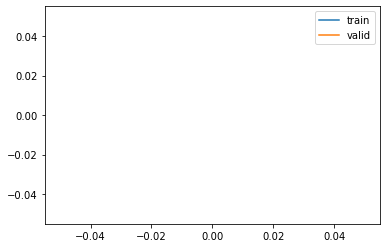

In [13]:
model.recorder.plot_loss()

## Testset Accuracy plot

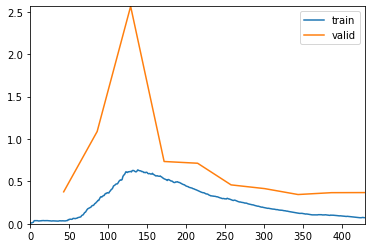

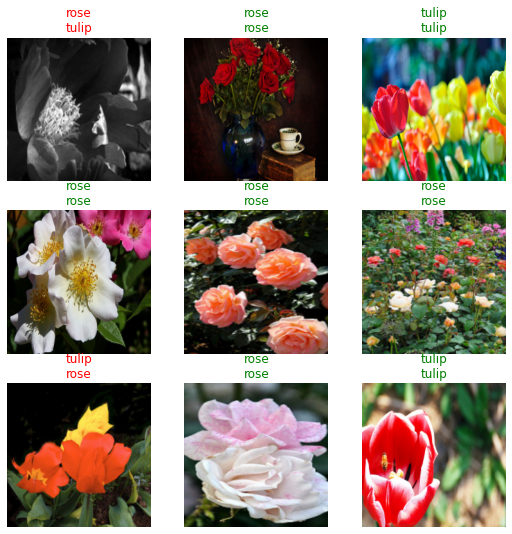

In [14]:
#model.recorder.after_epoch()
model.show_results()
model.fit_one_cycle(10, slice(5e-3,5e-2),cbs=[ShowGraphCallback()])

## Learning rate plot

lr is made constant on this training i.e 0.003

In [12]:
#model.recorder.plot_lr()
model.lr_find()

SuggestedLRs(lr_min=1.0964781722577755e-07, lr_steep=7.585775847473997e-07)

## Confusion Matrix on a test-set

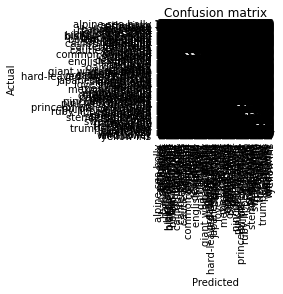

In [13]:
interp=ClassificationInterpretation.from_learner(model)
interp.plot_confusion_matrix(title='Confusion matrix')

### **Don't forget to give upvote if you like my work**

<h2> Save model learning </h2>

In [15]:
exportPath = '/home/tinhpt/Desktop/flower-recognition/Recognition - 99.13% test accuracy using fastai/model/'

In [16]:
model.export(exportPath + 'flower.pkl')

<h2>Testing<h2>